In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

warnings.filterwarnings('ignore')


In [3]:
#Load the data
job = pd.read_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/job_title_des.csv')
resume = pd.read_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/UpdatedResumeDataSet.csv')

In [4]:
pd.set_option('max_colwidth', 800)

#### Extract text from the pdf

In [4]:
# ! pip install PyPDF2
# ! pip install pdfplumber

In [5]:
import pdfplumber

CV="/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/Resume/senghak.pdf"


In [6]:
# # Open the PDF file with pdfplumber
# with pdfplumber.open(CV) as pdf:
#     # Get the number of pages
#     pages = len(pdf.pages)
    
#     # Initialize an empty list to store the extracted text from each page
#     extracted_text = []
    
#     # Loop through each page and extract text
#     for i in range(pages):
#         page = pdf.pages[i]
#         text = page.extract_text()
#         if text:  # Only append non-empty text
#             extracted_text.append(text)

In [7]:
# print(text)

In [8]:
# # Combine all pages' text into a single string
# full_text = ''.join(extracted_text)
# print(full_text)

In [9]:
# type(text), type(full_text)

In [10]:
# # Clean up the extracted text (remove newline characters)
# CV_Clear = full_text.replace("\n", " ")

In [11]:
# print(CV_Clear[:1000])

In [6]:
resume.head()

,Category,Resume
0,Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\..."
1,Data Science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen..."
2,Data Science,"Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Electronics Engineering Manipal Institute of Technology\r\nJanuary 2015 D..."
3,Data Science,"Skills â¢ R â¢ Python â¢ SAP HANA â¢ Tableau â¢ SAP HANA SQL â¢ SAP HANA PAL â¢ MS SQL â¢ SAP Lumira â¢ C# â¢ Linear Programming â¢ Data Modelling â¢ Advance Analytics â¢ SCM Analytics â¢ Retail Analytics â¢Social Media Analytics â¢ NLP Education Details \r\nJanuary 2017 to January 2018 PGDM Business Analytics Great Lakes Institute of Management & Illinois Institute of Technology\r\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University\r\nData Science Consultant \r\n\r\nConsultant - Deloitte USI\r\nSkill Details \r\nLINEAR PROGRAMMING- Exprience - 6 months\r\nRETAIL- Exprience - 6 months\r\nRETAIL MARKETING- Exprience - 6 months\r\nSCM- Exprience - 6 mo..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridabad, Haryana\r\nData Science internship \r\n\r\n\r\nSkill Details \r\nData Structure- Exprience - Less than 1 year months\r\nC- Exprience - Less than 1 year months\r\nData Analysis- Exprience - Less than 1 year months\r\nPython- Exprience - Less than 1 year months\r\nCore Java- Exprience - Less than 1 year months\r\nDatabase Management- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Itechpower\r\ndescription -"


In [7]:
resume['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [14]:
job.head()

,Unnamed: 0,Job Title,Job Description
0,0,Flutter Developer,"We are looking for hire experts flutter developer. So you are eligible this post then apply your resume.\nJob Types: Full-time, Part-time\nSalary: ₹20,000.00 - ₹40,000.00 per month\nBenefits:\nFlexible schedule\nFood allowance\nSchedule:\nDay shift\nSupplemental Pay:\nJoining bonus\nOvertime pay\nExperience:\ntotal work: 1 year (Preferred)\nHousing rent subsidy:\nYes\nIndustry:\nSoftware Development\nWork Remotely:\nTemporarily due to COVID-19"
1,1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.
2,2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n\nResponsibilities\n\nWe are looking for a capable data scientist to join the Analytics team, reporting locally in India Bangalore. This person’s responsibilities include research, design and development of Machine Learning and Deep Learning algorithms to tackle a variety of Fraud oriented challenges. The data scientist will work closely with software engineers and program managers to deliver end-to-end products, including: data collection in big scale and analysis, exploring different algorithmic approaches, model development, assessment and validation – all the way through production.\n\nQualifications\n\nAt least 3 years of hands-on development of complex Machine Learning models using modern frameworks and tools, ideally Python based.\nS..."
3,3,iOS Developer,"JOB DESCRIPTION:\n\nStrong framework outside of iOS is always a plus\n\niOS experience and generalist engineers with backgrounds in related technologies is a plus\n\nA disciplined approach to development, documentation and file structure\n\nStrong visual design sense and excellent taste\n\nA constant desire to improve, learn more and take things higher\n\nAn excellent understanding of networking, mobile network issues, concurrency and threading\n\nExperience working with internationalized apps\n\nRESPONSIBILITIES\nDesign and build advanced applications for the iOS platform.\nCollaborate with cross-functional teams to define, design, and ship new features..\nWork on bug fixing and improving application performance.\nContinuously discover, evaluate, and implement new technologies to maxi..."
4,4,Full Stack Developer,job responsibility full stack engineer – react role make impact petsmart transforming engineering team meet need rapidly changing retail environment role foundational helping build craft petsmart ’ prowess making react j native key framework across mobile web property working across web mobile application part building amazing mobile first customer experience impact customer store digital channel goal responsibility include act full stack developer across petsmart ’ various web mobile solution full stack engineer help build petsmart ’ competency using react j native across mobile web property partner web engineering team strategy share component across application best practice new advancement react community work product ux team review design concept offer suggestion decrease complexi...


By peeking into the text, we notice that there are non-alphanumeric characters, numbers, and backslashes that need to be cleaned in the text.

In [15]:
job = job.drop(columns=['Unnamed: 0'])

In [16]:
job.head()

,Job Title,Job Description
0,Flutter Developer,"We are looking for hire experts flutter developer. So you are eligible this post then apply your resume.\nJob Types: Full-time, Part-time\nSalary: ₹20,000.00 - ₹40,000.00 per month\nBenefits:\nFlexible schedule\nFood allowance\nSchedule:\nDay shift\nSupplemental Pay:\nJoining bonus\nOvertime pay\nExperience:\ntotal work: 1 year (Preferred)\nHousing rent subsidy:\nYes\nIndustry:\nSoftware Development\nWork Remotely:\nTemporarily due to COVID-19"
1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.
2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n\nResponsibilities\n\nWe are looking for a capable data scientist to join the Analytics team, reporting locally in India Bangalore. This person’s responsibilities include research, design and development of Machine Learning and Deep Learning algorithms to tackle a variety of Fraud oriented challenges. The data scientist will work closely with software engineers and program managers to deliver end-to-end products, including: data collection in big scale and analysis, exploring different algorithmic approaches, model development, assessment and validation – all the way through production.\n\nQualifications\n\nAt least 3 years of hands-on development of complex Machine Learning models using modern frameworks and tools, ideally Python based.\nS..."
3,iOS Developer,"JOB DESCRIPTION:\n\nStrong framework outside of iOS is always a plus\n\niOS experience and generalist engineers with backgrounds in related technologies is a plus\n\nA disciplined approach to development, documentation and file structure\n\nStrong visual design sense and excellent taste\n\nA constant desire to improve, learn more and take things higher\n\nAn excellent understanding of networking, mobile network issues, concurrency and threading\n\nExperience working with internationalized apps\n\nRESPONSIBILITIES\nDesign and build advanced applications for the iOS platform.\nCollaborate with cross-functional teams to define, design, and ship new features..\nWork on bug fixing and improving application performance.\nContinuously discover, evaluate, and implement new technologies to maxi..."
4,Full Stack Developer,job responsibility full stack engineer – react role make impact petsmart transforming engineering team meet need rapidly changing retail environment role foundational helping build craft petsmart ’ prowess making react j native key framework across mobile web property working across web mobile application part building amazing mobile first customer experience impact customer store digital channel goal responsibility include act full stack developer across petsmart ’ various web mobile solution full stack engineer help build petsmart ’ competency using react j native across mobile web property partner web engineering team strategy share component across application best practice new advancement react community work product ux team review design concept offer suggestion decrease complexi...


In [17]:
resume.shape

(962, 2)

In [18]:
job.shape

(2277, 2)

In [19]:
resume.columns , job.columns

(Index(['Category', 'Resume'], dtype='object'),
 Index(['Job Title', 'Job Description'], dtype='object'))

In [20]:
resume.Category.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [21]:
job.rename(columns={'Job Title': 'Job_title'}, inplace=True)
job.rename(columns={'Job Description': 'Job_description'}, inplace=True)
job.Job_title.value_counts()

Job_title
JavaScript Developer      166
Java Developer            161
Software Engineer         160
Node js developer         160
iOS Developer             159
PHP Developer             156
Flutter Developer         155
DevOps Engineer           155
Django Developer          152
Machine Learning          152
Backend Developer         147
Network Administrator     145
Database Administrator    139
Full Stack Developer      138
Wordpress Developer       132
Name: count, dtype: int64

In [22]:
len(resume.Category.value_counts()), len(job.Job_title.value_counts())

(25, 15)

* Out of 25 different categories, Java Developer class is the largest class with 84 resumes, whereas Advocates class is the smallest with only 20 resumes.
* Out of 15 different job categories, JavaScript Developer class is the largest class with 166 posts, whereas Wordpress Developer class is the smallest with only 132 posts.

In [23]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [24]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job_title        2277 non-null   object
 1   Job_description  2277 non-null   object
dtypes: object(2)
memory usage: 35.7+ KB


In [25]:
#Handling with null value
resume.isnull().sum() , job.isnull().sum()

(Category    0
 Resume      0
 dtype: int64,
 Job_title          0
 Job_description    0
 dtype: int64)

There is no missing value in our datasets which is good for the model.

#### Visualisation

[Text(0.5, 1.0, 'Resume Category')]

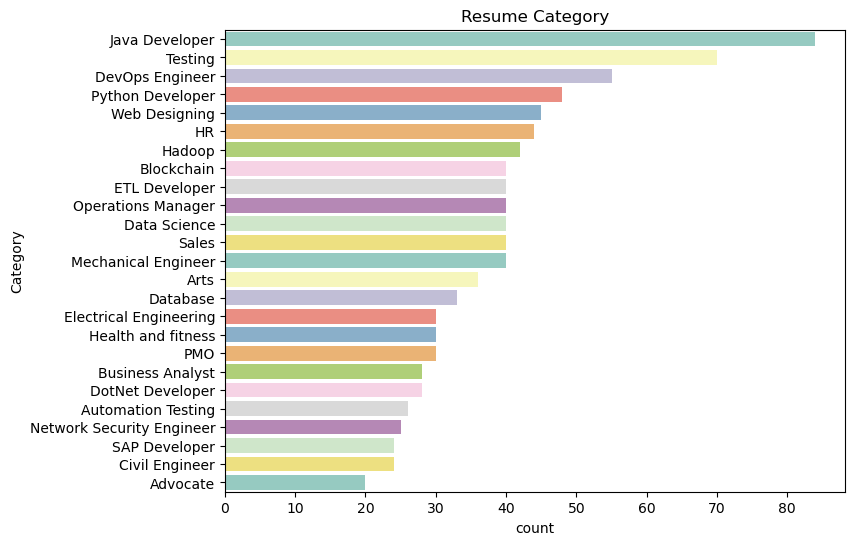

In [26]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(y="Category" , palette="Set3", data=resume, order = resume['Category'].value_counts().index).set(title='Resume Category')

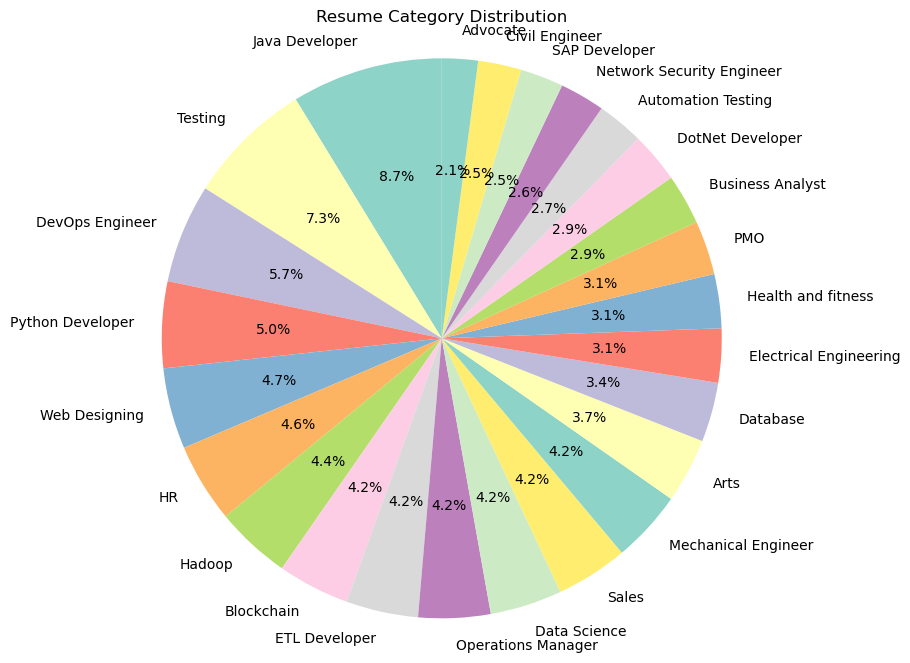

In [27]:
category_counts = resume['Category'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set3", len(category_counts)), startangle=90)
plt.title('Resume Category Distribution')
plt.axis('equal')
plt.show()

[Text(0.5, 1.0, 'Job Post')]

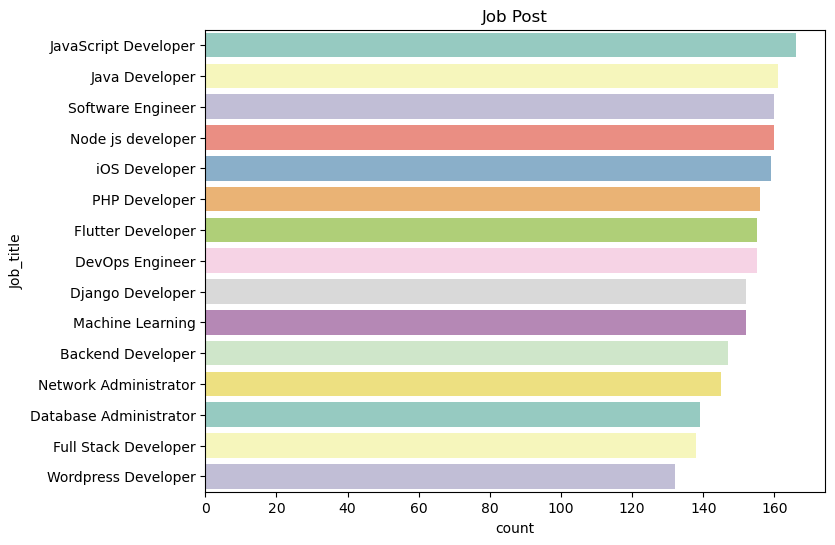

In [28]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(y="Job_title" , palette="Set3", data=job, order = job['Job_title'].value_counts().index).set(title='Job Post')

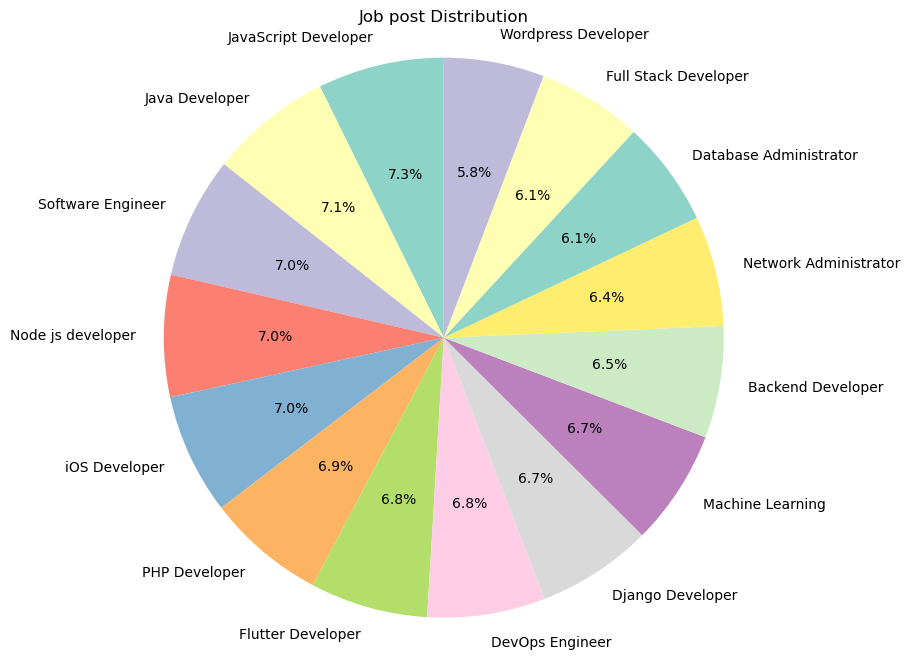

In [29]:
category_counts = job['Job_title'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set3", len(category_counts)), startangle=90)
plt.title('Job post Distribution')
plt.axis('equal')
plt.show()

In [30]:
#Review before cleaning
resume["Resume"][1]

'Education Details \r\nMay 2013 to May 2017 B.E   UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia                               Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.\r\nDeployed automated classification and regression model.\r\nlinkedin.com/in/aditya-rathore-\r\nb4600b146        

In [31]:
job["Job_description"][1]

'PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.'

### Text Cleaning

#### Resume

In [32]:
#Print the punctuation
# from string import punctuation
# print(punctuation)

In [33]:
!python -m spacy download en_core_web_sm 

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [34]:
#Clean text and return lowercase
import re

def cleanText(text):
    text = re.sub(r'[^a-zA-Z0-9\s+]', '', text)
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    text = re.sub(r'\d{10,}', '', text) 
    text = re.sub('\s+', ' ', text) #remove extra white space
    return text.lower()

In [35]:
resume['cleaned_resume'] = resume['Resume'].apply(lambda x: cleanText(x))
len(resume['cleaned_resume'][1])

1118

In [36]:
print(resume[['Resume', 'cleaned_resume']].head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Resume  \
0  Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, D

In [37]:
resume.head()

,Category,Resume,cleaned_resume
0,Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\...",skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm nave bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 2...
1,Data Science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen...",education details may 2013 to may 2017 be uitrgpv data scientist data scientist matelabs skill details python exprience less than 1 year months statsmodels exprience 12 months aws exprience less than 1 year months machine learning exprience less than 1 year months sklearn exprience less than 1 year months scipy exprience less than 1 year months keras exprience less than 1 year monthscompany details company matelabs description ml platform for business professionals dummies and enthusiasts 60a koramangala 5th block achievementstasks behind sukh sagar bengaluru india developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction deployed automated classification and regre...
2,Data Science,"Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Electronics Engineering Manipal

In [38]:
resume.tail()

,Category,Resume,cleaned_resume
957,Testing,"Computer Skills: â¢ Proficient in MS office (Word, Basic Excel, Power point) Strength: â¢ Hard working, Loyalty & Creativity â¢ Self-motivated, Responsible & Initiative â¢ Good people management skill & positive attitude. â¢ knowledge of windows, Internet.Education Details \r\n Bachelor of Electrical Engineering Electrical Engineering Nashik, Maharashtra Guru Gobind Singh College of Engineering and Research Centre\r\n Diploma Electrical Engineering Nashik, Maharashtra S. M. E. S. Polytechnic College\r\nTesting Engineer \r\n\r\n\r\nSkill Details \r\nEXCEL- Exprience - 6 months\r\nMS OFFICE- Exprience - 6 months\r\nWORD- Exprience - 6 monthsCompany Details \r\ncompany - \r\ndescription - Department: Testing\r\n\r\nResponsibilities: â¢ To check ACB and VCB of Circuit Breaker.\r\nâ...",computer skills proficient in ms office word basic excel power point strength hard working loyalty creativity selfmotivated responsible initiative good people management skill positive attitude knowledge of windows interneteducation details bachelor of electrical engineering electrical engineering nashik maharashtra guru gobind singh college of engineering and research centre diploma electrical engineering nashik maharashtra s m e s polytechnic college testing engineer skill details excel exprience 6 months ms office exprience 6 months word exprience 6 monthscompany details company description department testing responsibilities to check acb and vcb of circuit breaker following test conducted of circuit breaker as per drawing 1 to check breaker timing 2 to check contact resistance usin...
958,Testing,"â Willingness to accept the challenges. â Positive thinking. â Good learner. â Team Player. DECLARATION: I hereby declare that the above mentioned information is correct up to my knowledge and I bear the responsibility for the correctness of the above mentioned particulars. Date: / / Name: Dongare Mandakini Murlidhar Signature: Education Details \r\nJune 2015 Electronics and Telecommunication Engineering Kolhapur, Maharashtra Shivaji University\r\nJune 2012 Education Secondary and Higher Secondary\r\n B.E. Electronics and Telecommunication Jaywant College of Engineering and Management\r\nTesting Engineer \r\n\r\nElectronics Engineer - Abacus Electronics Pvt Ltd\r\nSkill Details \r\nLanguage - C, C++- Exprience - Less than 1 year months\r\nOperating Systems- Windows 7-8/NT/X...",willingness to accept the challenges positive thinking good learner team player declaration i hereby declare that the above mentioned information is correct up to my knowledge and i bear the responsibility for the correctness of the above mentioned particulars date name dongare mandakini murlidhar signature education details june 2015 electronics and telecommunication engineering kolhapur maharashtra shivaji university june 2012 education secondary and higher secondary be electronics and telecommunication jaywant college of engineering and management testing engineer electronics engineer abacus electronics pvt ltd skill details language c c++ exprience less than 1 year months operating systems windows 78ntxp exprience less than 1 year monthscompany details company abacus electronics p...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerness to learn new things, â¢ Competitive attitude, â¢ Good leadership qualities, â¢ Ability to deal with people diplomatically. PERSONAL DOSSIER Fathers Name: Dhanraj WaghEducation Details \r\nJanuary 2012 to January 2016 Bachelors of Engineering Engineering Pune, Maharashtra Pune University\r\nJanuary 2012 Higher Secondary Certificate Nashik, Maharashtra SND College of Engineering and Research Center\r\nJanuary 2010 Secondary School Certificate Yeola, Maharashtra Swami Muktanand Jr. College\r\n HSC Maharashtra State Board\r\n SSC Maharashtra State Bard\r\n BE Rajapur, Uttar Pradesh Madhyamik Vidya Mandir Rajapur\r\nTesting and Quality Control Engineer \r\n\r\nTesting and Quali

### LabelEncoder

In [39]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume["LabelEncoding"]=Encoder.fit_transform(resume["Category"])

resume

,Category,Resume,cleaned_resume,LabelEncoding
0,Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\...",skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm nave bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 2...,6
1,Data Science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen...",education details may 2013 to may 2017 be uitrgpv data scientist data scientist matelabs skill details python exprience less than 1 year months statsmodels exprience 12 months aws exprience less than 1 year months machine learning exprience less than 1 year months sklearn exprience less than 1 year months scipy exprience less than 1 year months keras exprience less than 1 year monthscompany details company matelabs description ml platform for business professionals dummies and enthusiasts 60a koramangala 5th block achievementstasks behind sukh sagar bengaluru india developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction deployed automated classification and regre...,6
2,Data Science,"Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Electronics E

In [40]:
resume['cleaned_resume'] = resume['cleaned_resume'].apply(lambda x: word_tokenize(x))

resume.head(2)

,Category,Resume,cleaned_resume,LabelEncoding
0,Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\...","[skills, programming, languages, python, pandas, numpy, scipy, scikitlearn, matplotlib, sql, java, javascriptjquery, machine, learning, regression, svm, nave, bayes, knn, random, forest, decision, trees, boosting, techniques, cluster, analysis, word, embedding, sentiment, analysis, natural, language, processing, dimensionality, reduction, topic, modelling, lda, nmf, pca, neural, nets, database, visualizations, mysql, sqlserver, cassandra, hbase, elasticsearch, d3js, dcjs, plotly, kibana, matplotlib, ggplot, tableau, others, regular, expression, html, css, angular, 6, logstash, kafka, python, flask, git, docker, computer, vision, open, cv, and, understanding, of, deep, learningeducation, details, data, science, assurance, associate, data, science, assurance, associate, ernst, young, llp...",6
1,Data Science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen...","[education, details, may, 2013, to, may, 2017, be, uitrgpv, data, scientist, data, scientist, matelabs, skill, details, python, exprience, less, than, 1, year, months, statsmodels, exprience, 12, months, aws, exprience, less, than, 1, year, months, machine, learning, exprience, less, than, 1, year, months, sklearn, exprience, less, than, 1, year, months, scipy, exprience, less, than, 1, year, months, keras, exprience, less, than, 1, year, monthscompany, details, company, matelabs, description, ml, platform, for, business, professionals, dummies, and, enthusiasts, 60a, koramangala, 5th, block, achievementstasks, behind, sukh, sagar, bengaluru, india, developed, and, deployed, auto, preprocessing, steps, of, machine, learning, mainly, missing, value, treatment, outlier, detection, ...]",6


In [41]:
DOMAIN_SPECIFIC_STOPWORDS = ['resume', 'job', 'candidate', 'apply', 'experience', 'skills']
stop_words = set(stopwords.words('english')).union(DOMAIN_SPECIFIC_STOPWORDS)

def remove_stopwords_from_tokens(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

In [42]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'apply',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'candidate',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'experience',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'job',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ou

In [43]:
len(stop_words)

185

In [44]:
resume['cleaned_resume'] = resume['cleaned_resume'].apply(lambda x: remove_stopwords_from_tokens(x))

In [45]:
resume.head(2)

,Category,Resume,cleaned_resume,LabelEncoding
0,Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\...","[programming, languages, python, pandas, numpy, scipy, scikitlearn, matplotlib, sql, java, javascriptjquery, machine, learning, regression, svm, nave, bayes, knn, random, forest, decision, trees, boosting, techniques, cluster, analysis, word, embedding, sentiment, analysis, natural, language, processing, dimensionality, reduction, topic, modelling, lda, nmf, pca, neural, nets, database, visualizations, mysql, sqlserver, cassandra, hbase, elasticsearch, d3js, dcjs, plotly, kibana, matplotlib, ggplot, tableau, others, regular, expression, html, css, angular, 6, logstash, kafka, python, flask, git, docker, computer, vision, open, cv, understanding, deep, learningeducation, details, data, science, assurance, associate, data, science, assurance, associate, ernst, young, llp, skill, details,...",6
1,Data Science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen...","[education, details, may, 2013, may, 2017, uitrgpv, data, scientist, data, scientist, matelabs, skill, details, python, exprience, less, 1, year, months, statsmodels, exprience, 12, months, aws, exprience, less, 1, year, months, machine, learning, exprience, less, 1, year, months, sklearn, exprience, less, 1, year, months, scipy, exprience, less, 1, year, months, keras, exprience, less, 1, year, monthscompany, details, company, matelabs, description, ml, platform, business, professionals, dummies, enthusiasts, 60a, koramangala, 5th, block, achievementstasks, behind, sukh, sagar, bengaluru, india, developed, deployed, auto, preprocessing, steps, machine, learning, mainly, missing, value, treatment, outlier, detection, encoding, scaling, feature, selection, dimensionality, reduction, dep...",6


In [46]:
# Lemmatise the tokens
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 10000000

def lemmatize_tokens(tokens):
    doc = nlp(' '.join(tokens))

    return [token.lemma_ for token in doc]

In [47]:
resume['cleaned_resume'] = resume['cleaned_resume'].apply(lambda x: lemmatize_tokens(x))

In [48]:
resume.head(2)

,Category,Resume,cleaned_resume,LabelEncoding
0,Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\...","[programming, language, python, pandas, numpy, scipy, scikitlearn, matplotlib, sql, java, javascriptjquery, machine, learn, regression, svm, nave, baye, knn, random, forest, decision, tree, boost, technique, cluster, analysis, word, embed, sentiment, analysis, natural, language, process, dimensionality, reduction, topic, model, lda, nmf, pca, neural, net, database, visualization, mysql, sqlserver, cassandra, hbase, elasticsearch, d3js, dcjs, plotly, kibana, matplotlib, ggplot, tableau, other, regular, expression, html, css, angular, 6, logstash, kafka, python, flask, git, docker, computer, vision, open, cv, understand, deep, learningeducation, detail, datum, science, assurance, associate, datum, science, assurance, associate, ernst, young, llp, skill, detail, javascript, exprience, 24,...",6
1,Data Science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen...","[education, detail, may, 2013, may, 2017, uitrgpv, data, scientist, data, scientist, matelabs, skill, detail, python, exprience, less, 1, year, month, statsmodels, exprience, 12, month, aw, exprience, less, 1, year, month, machine, learn, exprience, less, 1, year, month, sklearn, exprience, less, 1, year, month, scipy, exprience, less, 1, year, month, keras, exprience, less, 1, year, monthscompany, detail, company, matelab, description, ml, platform, business, professional, dummy, enthusiast, 60a, koramangala, 5th, block, achievementstask, behind, sukh, sagar, bengaluru, india, develop, deploy, auto, preprocessing, step, machine, learn, mainly, miss, value, treatment, outli, detection, encode, scale, feature, selection, dimensionality, reduction, deploy, automate, classification, regre...",6


In [49]:
def join_tokens_to_string(tokens):
    return ' '.join(tokens)

resume['cleaned_resume'] = resume['cleaned_resume'].apply(join_tokens_to_string)

In [50]:
resume.head(2)

,Category,Resume,cleaned_resume,LabelEncoding
0,Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\...",programming language python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learn regression svm nave baye knn random forest decision tree boost technique cluster analysis word embed sentiment analysis natural language process dimensionality reduction topic model lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau other regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understand deep learningeducation detail datum science assurance associate datum science assurance associate ernst young llp skill detail javascript exprience 24 month jquery exprience 24 month python exprience 24 monthscompany detail company ernst young ...,6
1,Data Science,"Education Details \r\nMay 2013 to May 2017 B.E UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatmen...",education detail may 2013 may 2017 uitrgpv data scientist data scientist matelabs skill detail python exprience less 1 year month statsmodels exprience 12 month aw exprience less 1 year month machine learn exprience less 1 year month sklearn exprience less 1 year month scipy exprience less 1 year month keras exprience less 1 year monthscompany detail company matelab description ml platform business professional dummy enthusiast 60a koramangala 5th block achievementstask behind sukh sagar bengaluru india develop deploy auto preprocessing step machine learn mainly miss value treatment outli detection encode scale feature selection dimensionality reduction deploy automate classification regression model linkedincominadityarathore b4600b146 reasearch deploy time series forecasting model ar...,6


In [51]:
# Join all resumes into a single large string for word cloud generation

resumes_text = ' '.join(resume['cleaned_resume'])

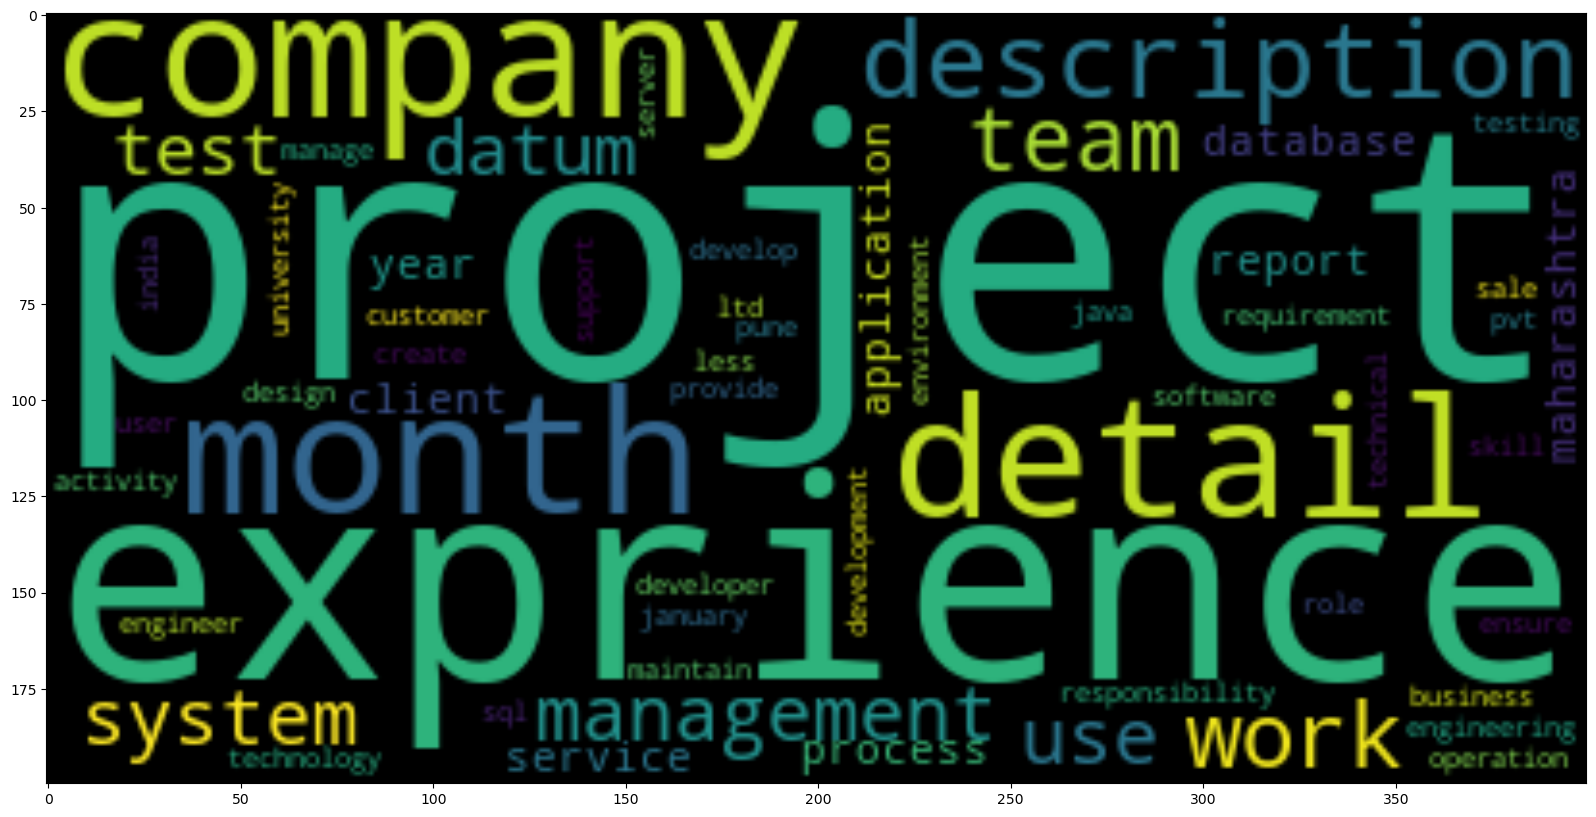

In [52]:
from wordcloud import WordCloud
wordcloudimage = WordCloud( font_step=2 ,
max_font_size=500,
collocations = False,

collocation_threshold = 1
).generate(resumes_text)
plt.figure(figsize=(25, 10))
plt.imshow(wordcloudimage, interpolation='bilinear')
# plt.axis("off")
plt.show()

As we can see, we already remove the word 'experience' from our tokens but it still appear in the image. The reason is because it is incorrect spelling 'exprience'.

In [53]:
text ="modelling"
doc=nlp(text)

for token in doc:
    print(f"Word: {token.text}, Lemma: {token.lemma_}")

Word: modelling, Lemma: model


In [54]:
text ="visualisation"
doc=nlp(text)

for token in doc:
    print(f"Word: {token.text}, Lemma: {token.lemma_}")

Word: visualisation, Lemma: visualisation


##### Save Cleaned Resume

In [55]:
resume_cleaned = resume[['Category','cleaned_resume', 'LabelEncoding']]

In [56]:
resume_cleaned.to_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/Preprocessed/Cleaned_resume.csv', index=False)

#### Job

In [57]:
job['cleaned_job'] = job['Job_description'].apply(lambda x: cleanText(x))

### LabelEncoder

In [58]:

Encoder=LabelEncoder()
job["LabelEncoding"]=Encoder.fit_transform(job["Job_title"])

In [59]:
job.head()

,Job_title,Job_description,cleaned_job,LabelEncoding
0,Flutter Developer,"We are looking for hire experts flutter developer. So you are eligible this post then apply your resume.\nJob Types: Full-time, Part-time\nSalary: ₹20,000.00 - ₹40,000.00 per month\nBenefits:\nFlexible schedule\nFood allowance\nSchedule:\nDay shift\nSupplemental Pay:\nJoining bonus\nOvertime pay\nExperience:\ntotal work: 1 year (Preferred)\nHousing rent subsidy:\nYes\nIndustry:\nSoftware Development\nWork Remotely:\nTemporarily due to COVID-19",we are looking for hire experts flutter developer so you are eligible this post then apply your resume job types fulltime parttime salary 2000000 4000000 per month benefits flexible schedule food allowance schedule day shift supplemental pay joining bonus overtime pay experience total work 1 year preferred housing rent subsidy yes industry software development work remotely temporarily due to covid19,4
1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.,pythondjango developerlead job codepdj 04 strong python experience in api development restrpc experience working with api frameworks djangoflask experience evaluating and improving the efficiency of programs in a linux environment ability to effectively handle multiple tasks with a high level of accuracy and attention to detail good verbal and written communication skills working knowledge of sql json experience preferred good knowledge in automated unit testing using pyunit,3
2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n\nResponsibilities\n\nWe are looking for a capable data scientist to join the Analytics team, reporting locally in India Bangalore. This person’s responsibilities include research, design and development of Machine Learning and Deep Learning algorithms to tackle a variety of Fraud oriented challenges. The data scientist will work closely with software engineers and program managers to deliver end-to-end products, including: data collection in big scale and analysis, exploring different algorithmic approaches, model development, assessment and validation – all the way through production.\n\nQualifications\n\nAt least 3 years of hands-on development of complex Machine Learning models using modern frameworks and tools, ideally Python based.\nS...",data scientist contractor bangalore in responsibilities we are looking for a capable data scientist to join the analytics team reporting locally in india bangalore this persons responsibilities include research design and development of machine learning and deep learning algorithms to tackle a variety of fraud oriented challenges the data scientist will work closely with software engineers and program managers to deliver endtoend products including data collection in big scale and analysis exploring different algorithmic approaches model development assessment and validation all the way through production qualifications at least 3 years of handson development of complex machine learning models using modern frameworks and tools ideally python based solid understanding of statistics and ...,8
3,iOS Developer,"JOB DESCRIPTION:\n\nStrong framework outside of iOS is always a plus\n\niOS experience and generalist engineers with backgrounds in related technologies is a plus\n\nA disciplined approach to development, documentation and file structure\n\nStrong visual design sense and excellent taste\n\nA constant desire to improve, learn more and take things higher\n\nAn excellent understanding of networking, mobile network iss

In [60]:
job.tail()

,Job_title,Job_description,cleaned_job,LabelEncoding
2272,Backend Developer,"Job Summary\nPublished on : 26 days ago\nVacancy : 6\nEmployment Status : Full Time\nExperience : 0 - 2 Yrs\nSalary : 20000-35000\nInterview Venue : BELLARY\n\nAbout You\n\nYou are an experienced back-end developer who is passionate about writing great modular code and implementing back-end features that are stable and efficient\nYou are a team player who has a strong desire to take on responsibility and loves solving complex back-end engineering problems\nA positive attitude with a desire to grow within a collaborative, inspiring team environment\nSelf-motivation and an infectious spirit of innovative thinking and a sharp attention to detail\nIn this role, you will\n\nImplement complex business logic, create database models and write API controllers\nDesign, code and unit test back-en...",job summary published on 26 days ago vacancy 6 employment status full time experience 0 2 yrs salary interview venue bellary about you you are an experienced backend developer who is passionate about writing great modular code and implementing backend features that are stable and efficient you are a team player who has a strong desire to take on responsibility and loves solving complex backend engineering problems a positive attitude with a desire to grow within a collaborative inspiring team environment selfmotivation and an infectious spirit of innovative thinking and a sharp attention to detail in this role you will implement complex business logic create database models and write api controllers design code and unit test backend code that are functional modular and reusable that ad...,0
2273,Full Stack Developer,business entity cisco umbrella focus cloud-based security operate agile company low management overhead startup-like environment use variety technology across many operating system including web technology analytics client software company fun high- performance celebrates success allows employee really work cisco respect employee time belief work-life balance offer flexible telecommuting option leading charge within cisco transition security strategy cloud major contributor effort 'll using latest cloud service technology 'll build tool automation service make easier develop deploy feature customer focused core platform mission craft system tool enable team work quickly effectively 'll work join dynamic multi-talented engineering team new feature delivered customer multiple time day ap...,business entity cisco umbrella focus cloudbased security operate agile company low management overhead startuplike environment use variety technology across many operating system including web technology analytics client software company fun high performance celebrates success allows employee really work cisco respect employee time belief worklife balance offer flexible telecommuting option leading charge within cisco transition security strategy cloud major contributor effort ll using latest cloud service technology ll build tool automation service make easier develop deploy feature customer focused core platform mission craft system tool enable team work quickly effectively ll work join dynamic multitalented engineering team new feature delivered customer multiple time day apply star...,5
2274,Network Administrator,"Urgently reqd in a college in Mohali\nNetwork Administrator for handling all the networking facilities in the campus\nexperience of at least 3 yrs must in the same field.\nMale candidate Only\nJob Type: Full-time\nSalary: ₹11,474.00 - ₹27,240.00 per month\nSchedule:\nMorning shift\nExperience:\nwork: 1 year (Preferred)\ntotal work: 1 year (Preferred)\nNetwork Administration: 1 year (Preferred)\nEducation:\nSecondary(10th Pass) (Preferred)",urgently reqd in a college in mohali network administrator for handling all the networking facilities in the campus experience of at least 3 yrs must in the same field male candidate only job type fulltime salary 1147400

In [61]:
job['cleaned_job'] = job['cleaned_job'].apply(lambda x: word_tokenize(x))

In [62]:
job.head(2)

,Job_title,Job_description,cleaned_job,LabelEncoding
0,Flutter Developer,"We are looking for hire experts flutter developer. So you are eligible this post then apply your resume.\nJob Types: Full-time, Part-time\nSalary: ₹20,000.00 - ₹40,000.00 per month\nBenefits:\nFlexible schedule\nFood allowance\nSchedule:\nDay shift\nSupplemental Pay:\nJoining bonus\nOvertime pay\nExperience:\ntotal work: 1 year (Preferred)\nHousing rent subsidy:\nYes\nIndustry:\nSoftware Development\nWork Remotely:\nTemporarily due to COVID-19","[we, are, looking, for, hire, experts, flutter, developer, so, you, are, eligible, this, post, then, apply, your, resume, job, types, fulltime, parttime, salary, 2000000, 4000000, per, month, benefits, flexible, schedule, food, allowance, schedule, day, shift, supplemental, pay, joining, bonus, overtime, pay, experience, total, work, 1, year, preferred, housing, rent, subsidy, yes, industry, software, development, work, remotely, temporarily, due, to, covid19]",4
1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.,"[pythondjango, developerlead, job, codepdj, 04, strong, python, experience, in, api, development, restrpc, experience, working, with, api, frameworks, djangoflask, experience, evaluating, and, improving, the, efficiency, of, programs, in, a, linux, environment, ability, to, effectively, handle, multiple, tasks, with, a, high, level, of, accuracy, and, attention, to, detail, good, verbal, and, written, communication, skills, working, knowledge, of, sql, json, experience, preferred, good, knowledge, in, automated, unit, testing, using, pyunit]",3


In [63]:
job['cleaned_job'] = job['cleaned_job'].apply(lambda x: remove_stopwords_from_tokens(x))

In [64]:
job.head(2)

,Job_title,Job_description,cleaned_job,LabelEncoding
0,Flutter Developer,"We are looking for hire experts flutter developer. So you are eligible this post then apply your resume.\nJob Types: Full-time, Part-time\nSalary: ₹20,000.00 - ₹40,000.00 per month\nBenefits:\nFlexible schedule\nFood allowance\nSchedule:\nDay shift\nSupplemental Pay:\nJoining bonus\nOvertime pay\nExperience:\ntotal work: 1 year (Preferred)\nHousing rent subsidy:\nYes\nIndustry:\nSoftware Development\nWork Remotely:\nTemporarily due to COVID-19","[looking, hire, experts, flutter, developer, eligible, post, types, fulltime, parttime, salary, 2000000, 4000000, per, month, benefits, flexible, schedule, food, allowance, schedule, day, shift, supplemental, pay, joining, bonus, overtime, pay, total, work, 1, year, preferred, housing, rent, subsidy, yes, industry, software, development, work, remotely, temporarily, due, covid19]",4
1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.,"[pythondjango, developerlead, codepdj, 04, strong, python, api, development, restrpc, working, api, frameworks, djangoflask, evaluating, improving, efficiency, programs, linux, environment, ability, effectively, handle, multiple, tasks, high, level, accuracy, attention, detail, good, verbal, written, communication, working, knowledge, sql, json, preferred, good, knowledge, automated, unit, testing, using, pyunit]",3


In [65]:
job['cleaned_job'] = job['cleaned_job'].apply(lambda x: lemmatize_tokens(x))

In [66]:
job.head(2)

,Job_title,Job_description,cleaned_job,LabelEncoding
0,Flutter Developer,"We are looking for hire experts flutter developer. So you are eligible this post then apply your resume.\nJob Types: Full-time, Part-time\nSalary: ₹20,000.00 - ₹40,000.00 per month\nBenefits:\nFlexible schedule\nFood allowance\nSchedule:\nDay shift\nSupplemental Pay:\nJoining bonus\nOvertime pay\nExperience:\ntotal work: 1 year (Preferred)\nHousing rent subsidy:\nYes\nIndustry:\nSoftware Development\nWork Remotely:\nTemporarily due to COVID-19","[look, hire, expert, flutter, developer, eligible, post, type, fulltime, parttime, salary, 2000000, 4000000, per, month, benefit, flexible, schedule, food, allowance, schedule, day, shift, supplemental, pay, join, bonus, overtime, pay, total, work, 1, year, prefer, housing, rent, subsidy, yes, industry, software, development, work, remotely, temporarily, due, covid19]",4
1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.,"[pythondjango, developerlead, codepdj, 04, strong, python, api, development, restrpc, work, api, framework, djangoflask, evaluate, improve, efficiency, program, linux, environment, ability, effectively, handle, multiple, task, high, level, accuracy, attention, detail, good, verbal, write, communication, work, knowledge, sql, json, prefer, good, knowledge, automate, unit, testing, use, pyunit]",3


In [67]:
job['cleaned_job'] = job['cleaned_job'].apply(join_tokens_to_string)

job.head(2)

,Job_title,Job_description,cleaned_job,LabelEncoding
0,Flutter Developer,"We are looking for hire experts flutter developer. So you are eligible this post then apply your resume.\nJob Types: Full-time, Part-time\nSalary: ₹20,000.00 - ₹40,000.00 per month\nBenefits:\nFlexible schedule\nFood allowance\nSchedule:\nDay shift\nSupplemental Pay:\nJoining bonus\nOvertime pay\nExperience:\ntotal work: 1 year (Preferred)\nHousing rent subsidy:\nYes\nIndustry:\nSoftware Development\nWork Remotely:\nTemporarily due to COVID-19",look hire expert flutter developer eligible post type fulltime parttime salary 2000000 4000000 per month benefit flexible schedule food allowance schedule day shift supplemental pay join bonus overtime pay total work 1 year prefer housing rent subsidy yes industry software development work remotely temporarily due covid19,4
1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.,pythondjango developerlead codepdj 04 strong python api development restrpc work api framework djangoflask evaluate improve efficiency program linux environment ability effectively handle multiple task high level accuracy attention detail good verbal write communication work knowledge sql json prefer good knowledge automate unit testing use pyunit,3


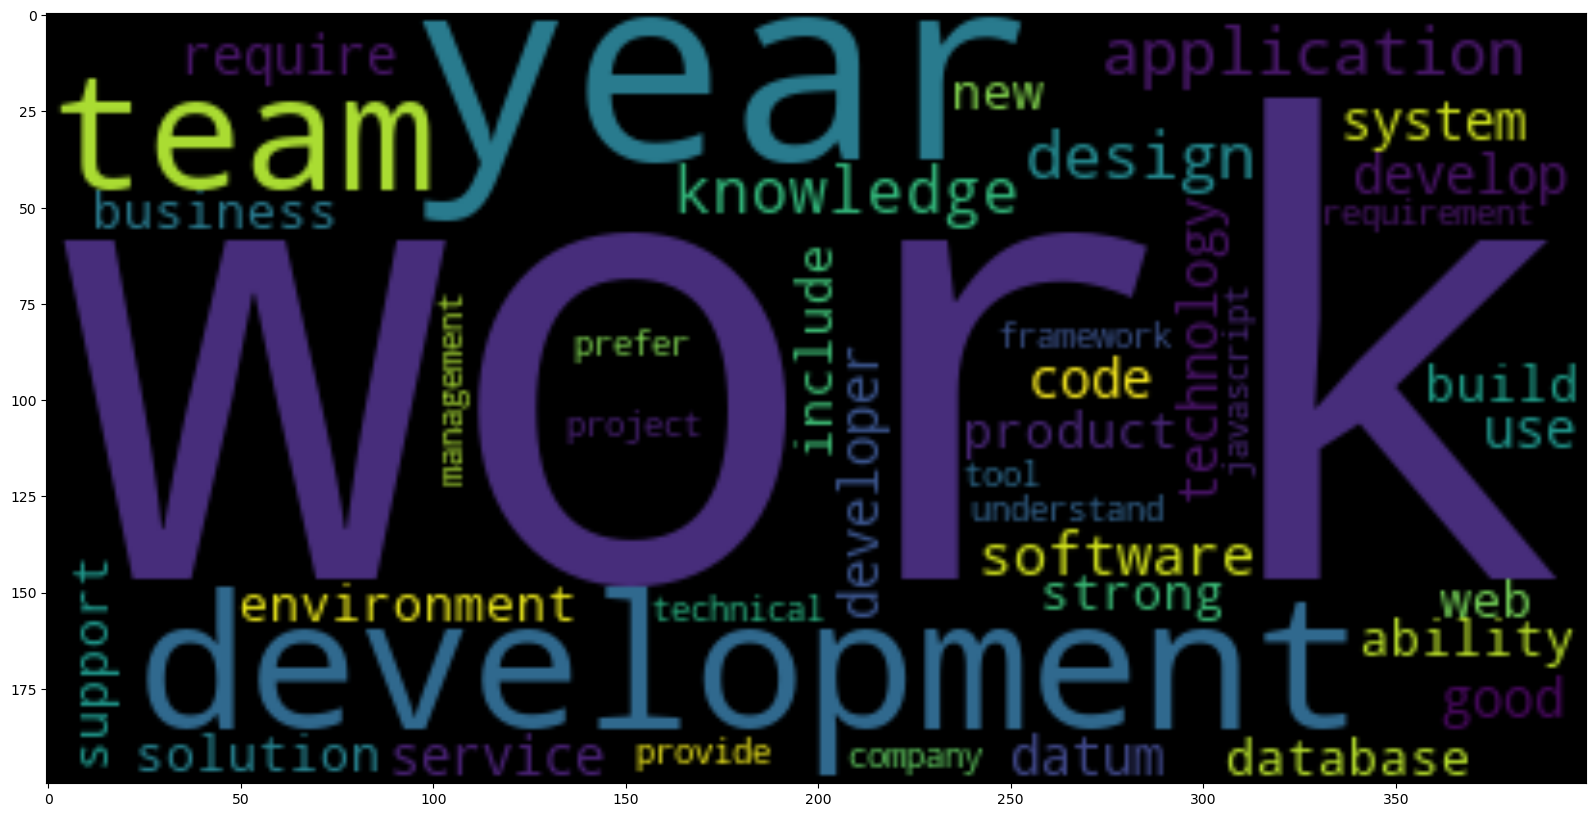

In [68]:
job_text = ' '.join(job['cleaned_job'])

wordcloudimage = WordCloud( font_step=2 ,
max_font_size=500,
collocations = False,

collocation_threshold = 1
).generate(job_text)
plt.figure(figsize=(25, 10))
plt.imshow(wordcloudimage, interpolation='bilinear')
# plt.axis("off")
plt.show()

##### Save file

In [69]:
job_cleaned = job[['Job_title','cleaned_job', 'LabelEncoding']]

In [70]:
job_cleaned.to_csv('/Users/macbookair/Desktop/project/Resume_Analyser/resume-job-matching/data/Preprocessed/Cleaned_job.csv', index=False)